**Big Market Dataset**
used to predict the outlet sales of an item
(Regression task)


In [2]:
# Import libraries for data handling, preprocessing, PCA, and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")  # Suppress warnings for clean output

In [4]:
# Load the dataset
df = pd.read_csv('/content/train2.xls')

# Initial overview: Shape, info, and sample data
print("Dataset Shape:", df.shape)
df.info()  # Data types and non-null counts


Dataset Shape: (6000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6000 non-null   object 
 1   Item_Weight                4994 non-null   float64
 2   Item_Fat_Content           6000 non-null   object 
 3   Item_Visibility            6000 non-null   float64
 4   Item_Type                  6000 non-null   object 
 5   Item_MRP                   6000 non-null   float64
 6   Outlet_Identifier          6000 non-null   object 
 7   Outlet_Establishment_Year  6000 non-null   int64  
 8   Outlet_Size                4289 non-null   object 
 9   Outlet_Location_Type       6000 non-null   object 
 10  Outlet_Type                6000 non-null   object 
 11  Item_Outlet_Sales          6000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 562.6+ KB


In [5]:
#we have to know the number of missing values
df.isnull().sum()
#finding duplicates:
df.duplicated().sum()
#finding garbage values:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

Item_Identifier
FDU23    8
FDF16    8
FDW49    8
FDR43    8
NCF42    8
        ..
FDG04    1
FDE52    1
DRL59    1
FDH04    1
FDX13    1
Name: count, Length: 1553, dtype: int64
******************************
Item_Fat_Content
Low Fat    3595
Regular    2030
LF          220
reg          81
low fat      74
Name: count, dtype: int64
******************************
Item_Type
Fruits and Vegetables    875
Snack Foods              840
Household                643
Frozen Foods             621
Dairy                    487
Canned                   455
Baking Goods             454
Health and Hygiene       342
Soft Drinks              311
Meat                     294
Breads                   182
Hard Drinks              150
Others                   117
Starchy Foods            108
Breakfast                 75
Seafood                   46
Name: count, dtype: int64
******************************
Outlet_Identifier
OUT045    677
OUT013    672
OUT035    671
OUT046    664
OUT027    659
OUT017    644
OUT04

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,4994.0,62345.287399,3.380371e+06,-69.30,8.89500,12.80000,17.100000,2.243579e+08
Item_Visibility,6000.0,0.066333,5.149233e-02,0.00,0.02703,0.05462,0.095154,3.283909e-01
Item_MRP,6000.0,141.228200,6.254057e+01,31.29,94.03765,143.19700,186.522050,2.668884e+02
Outlet_Establishment_Year,6000.0,1997.840333,8.334412e+00,1985.00,1987.00000,1999.00000,2004.000000,2.009000e+03
Item_Outlet_Sales,6000.0,7.303403,1.014361e+00,3.51,6.75000,7.50000,8.040000,9.400000e+00


In [7]:
# Uniques loop for EDA: Identify inconsistencies/outliers/missings
print("\nUnique Values per Column:")
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("---------------")


Unique Values per Column:
Column: Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCX17' 'FDH31' 'FDX13']
---------------
Column: Item_Weight
[-6.93000000e+01  5.92000000e+00  1.75000000e+01  1.92000000e+01
  8.93000000e+00  1.03950000e+01  1.36500000e+01             nan
  1.62000000e+01  1.18000000e+01  1.85000000e+01 -1.58000000e+01
  1.76000000e+01  1.63500000e+01  9.00000000e+00  1.33500000e+01
  1.88500000e+01  1.46000000e+01  1.38500000e+01  1.30000000e+01
  7.64500000e+00  1.16500000e+01  5.92500000e+00  1.92500000e+01
  1.86000000e+01  1.87000000e+01  1.78500000e+01  1.00000000e+01
  8.85000000e+00  9.80000000e+00  1.36000000e+01  5.00000000e+06
  1.21500000e+01  6.42000000e+00  1.96000000e+01  1.58500000e+01
  7.39000000e+00  1.01950000e+01  9.89500000e+00  1.08950000e+01
  7.90500000e+00  9.19500000e+00  8.36500000e+00  1.51000000e+01
  7.97000000e+00  1.77000000e+01  1.93500000e+01  8.64500000e+00
  1.56000000e+01  8.19299290e+07  1.82500000e+01  7.85500000e+00
  7.82500000e+

In [8]:
#solve first problem inconsistent categories
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({
    "LF": "Low Fat",
    "low fat": "Low Fat",
    "reg": "Regular"
})

df["Outlet_Size"] = df["Outlet_Size"].replace({"MEdium": "Medium"})
df["Outlet_Size"] = df["Outlet_Size"].replace({"MEDIUM": "Medium"})
df["Outlet_Size"] = df["Outlet_Size"].replace({"HIGH": "High"})
df["Outlet_Size"] = df["Outlet_Size"].replace({"SMall": "Small"})
df["Outlet_Size"] = df["Outlet_Size"].replace({"SMALL": "Small"})
df["Outlet_Size"] = df["Outlet_Size"].replace({"sMALL": "Small"})

print("Categories fixed! Check uniques:")
print("Fat_Content uniques:", df['Item_Fat_Content'].unique())
print("Outlet_Size uniques:", df['Outlet_Size'].unique())

Categories fixed! Check uniques:
Fat_Content uniques: ['Low Fat' 'Regular']
Outlet_Size uniques: ['Medium' nan 'High' 'Small']


In [9]:
# Sanity check: Verify column names (no extra spaces/casing issues)
print("Column Names:")
print(df.columns.tolist())

Column Names:
['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']


Boxplots for Numeric Columns (Before Full Cleaning):


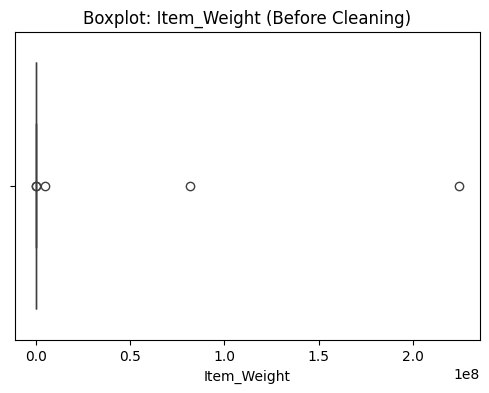

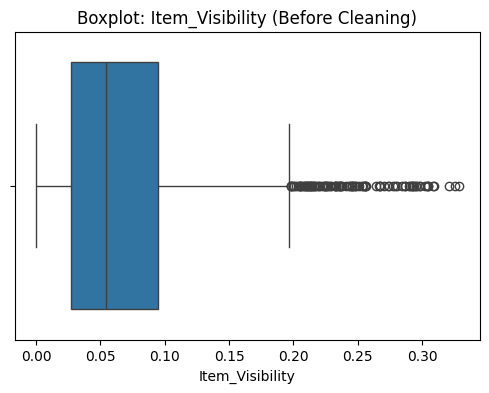

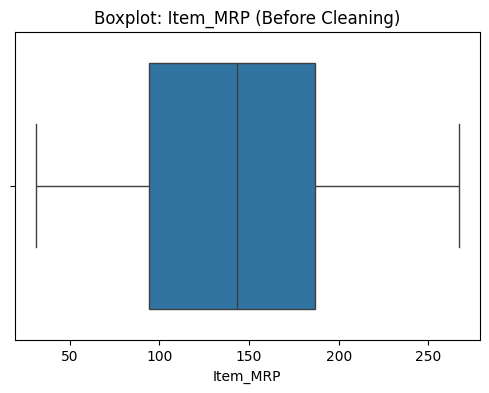

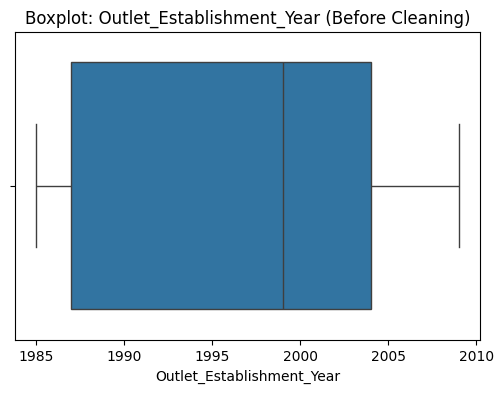

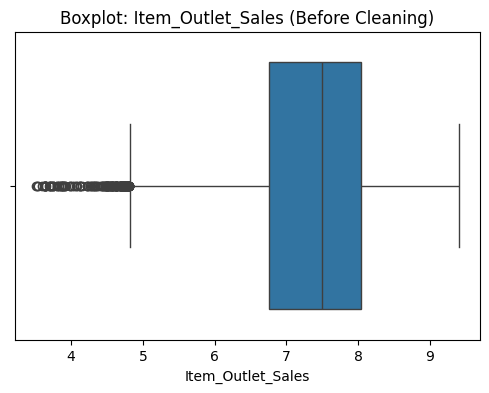

Boxplots saved in 'plots/' folder!


In [10]:
# Step 2: Visualize numeric outliers with boxplots (pre-cleaning inspection) – Save to folder
print("Boxplots for Numeric Columns (Before Full Cleaning):")

# Create 'plots' folder for saving graphs
os.makedirs('plots', exist_ok=True)

for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot: {i} (Before Cleaning)')
    plt.savefig(f'plots/boxplot_{i}.png', dpi=300, bbox_inches='tight')  # Save high-res
    plt.show()
    plt.close()  # Close to free memory

print("Boxplots saved in 'plots/' folder!")

In [11]:
#Solving missing values
df["Item_Weight"] = df.groupby("Item_Identifier")["Item_Weight"].transform(
    lambda x: x.fillna(x.mean())
)
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].mean())

df["Outlet_Size"] = df.groupby("Outlet_Type")["Outlet_Size"].transform(
    lambda x: x.fillna(x.mode()[0] if len(x.mode()) > 0 else "Medium")
)

In [12]:
# Validation: Check missings after imputation
print("Missings after imputation:")
print(df.isnull().sum())

Missings after imputation:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [13]:
print("\nSample after imputation (first 10 rows):")
df.head(10)


Sample after imputation (first 10 rows):


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,-69.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.23
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.09
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.65
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.60
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.90
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.32
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,5.84
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,8.30
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,6.98
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,8.46


In [14]:
#fix the inconsistant zero value on the column "Item_visibility"
mean_vis = df["Item_Visibility"].mean()
df.loc[df["Item_Visibility"] == 0, "Item_Visibility"] = mean_vis
print("Inconsistent zero values in 'Item_Visibility' fixed!")

Inconsistent zero values in 'Item_Visibility' fixed!


In [15]:
#discover negative columns
for col in df.columns:
    if df[col].dtype != "object":
        negatives = df[df[col] < 0]
        if len(negatives) > 0:
            print(f"Negative values found in: {col}")
            print(negatives[col])
            print("\n")


Negative values found in: Item_Weight
0    -69.3
12   -15.8
Name: Item_Weight, dtype: float64




In [16]:
#solving the negatives items on the weights
df["Item_Weight"] = df["Item_Weight"].abs()
print("Negative values in 'Item_Weight' fixed to absolute values!")

Negative values in 'Item_Weight' fixed to absolute values!


In [17]:
#insure we don't have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6000 non-null   object 
 1   Item_Weight                6000 non-null   float64
 2   Item_Fat_Content           6000 non-null   object 
 3   Item_Visibility            6000 non-null   float64
 4   Item_Type                  6000 non-null   object 
 5   Item_MRP                   6000 non-null   float64
 6   Outlet_Identifier          6000 non-null   object 
 7   Outlet_Establishment_Year  6000 non-null   int64  
 8   Outlet_Size                6000 non-null   object 
 9   Outlet_Location_Type       6000 non-null   object 
 10  Outlet_Type                6000 non-null   object 
 11  Item_Outlet_Sales          6000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 562.6+ KB


In [18]:
Y=df['Item_Outlet_Sales']
X=df.drop(columns=['Item_Outlet_Sales'])

In [19]:
#Discover outliers
num_cols = X.select_dtypes(include=["float64", "int64"]).columns

for col in num_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = X[(X[col] < lower) | (X[col] > upper)]

    print("="*60)
    print(f" Outliers in column: {col}")
    print(f"Lower Bound: {lower:.2f}, Upper Bound: {upper:.2f}")
    print(f"Number of outliers: {len(outliers)}")
    print(outliers[[col]].head())  # Display sample


 Outliers in column: Item_Weight
Lower Bound: -3.41, Upper Bound: 29.41
Number of outliers: 25
      Item_Weight
0    6.930000e+01
43   5.000000e+06
71   8.192993e+07
186  7.215244e+04
300  7.215244e+04
 Outliers in column: Item_Visibility
Lower Bound: -0.06, Upper Bound: 0.19
Number of outliers: 114
     Item_Visibility
49          0.255395
65          0.195068
83          0.293418
108         0.278974
174         0.291865
 Outliers in column: Item_MRP
Lower Bound: -44.69, Upper Bound: 325.25
Number of outliers: 0
Empty DataFrame
Columns: [Item_MRP]
Index: []
 Outliers in column: Outlet_Establishment_Year
Lower Bound: 1961.50, Upper Bound: 2029.50
Number of outliers: 0
Empty DataFrame
Columns: [Outlet_Establishment_Year]
Index: []


In [20]:
#clipping to solve the item_visibility outliers
#clipping to solve the item_weight outliers

def fix_outliers(col):
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    X[col] = np.clip(X[col], lower, upper)

fix_outliers("Item_Weight")
fix_outliers("Item_Visibility")

In [21]:
# Create folder for processed data
os.makedirs('processed_data', exist_ok=True)
print("Processed data folder created: 'processed_data/'")

# Save the full cleaned df
df.to_csv('processed_data/cleaned_data.csv', index=False)
print("Cleaned data saved as 'processed_data/cleaned_data.csv' – Shape:", df.shape)
print("Load later: pd.read_csv('processed_data/cleaned_data.csv')")


Processed data folder created: 'processed_data/'
Cleaned data saved as 'processed_data/cleaned_data.csv' – Shape: (6000, 12)
Load later: pd.read_csv('processed_data/cleaned_data.csv')


In [22]:
categorical_cols = X.select_dtypes(include=['object']).columns

le = LabelEncoder()

for col in categorical_cols:
    X[col + '_Encoded'] = le.fit_transform(X[col])

In [ ]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_Encoded,Item_Fat_Content_Encoded,Item_Type_Encoded,Outlet_Identifier_Encoded,Outlet_Size_Encoded,Outlet_Location_Type_Encoded,Outlet_Type_Encoded
0,FDA15,29.4075,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,156,0,4,9,1,0,1
1,DRC01,5.9200,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,8,1,14,3,1,2,2
2,FDN15,17.5000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,661,0,10,9,1,0,1
3,FDX07,19.2000,Regular,0.066333,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,1119,1,6,0,2,2,0
4,NCD19,8.9300,Low Fat,0.066333,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,1295,0,9,1,0,2,1


In [23]:
X = X.drop(columns=categorical_cols)


In [24]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_Encoded,Item_Fat_Content_Encoded,Item_Type_Encoded,Outlet_Identifier_Encoded,Outlet_Size_Encoded,Outlet_Location_Type_Encoded,Outlet_Type_Encoded
0,29.4075,0.016047,249.8092,1999,156,0,4,9,1,0,1
1,5.9200,0.019278,48.2692,2009,8,1,14,3,1,2,2
2,17.5000,0.016760,141.6180,1999,661,0,10,9,1,0,1
3,19.2000,0.066333,182.0950,1998,1119,1,6,0,2,2,0
4,8.9300,0.066333,53.8614,1987,1295,0,9,1,0,2,1


In [25]:
print(X.columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier_Encoded',
       'Item_Fat_Content_Encoded', 'Item_Type_Encoded',
       'Outlet_Identifier_Encoded', 'Outlet_Size_Encoded',
       'Outlet_Location_Type_Encoded', 'Outlet_Type_Encoded'],
      dtype='object')


In [26]:
# Validation: Check missings after imputation
print("Missings after imputation:")
print(X.isnull().sum())

Missings after imputation:
Item_Weight                     0
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Identifier_Encoded         0
Item_Fat_Content_Encoded        0
Item_Type_Encoded               0
Outlet_Identifier_Encoded       0
Outlet_Size_Encoded             0
Outlet_Location_Type_Encoded    0
Outlet_Type_Encoded             0
dtype: int64


In [27]:
#Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)
X.head

<bound method NDFrame.head of       Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0        3.439219        -1.172489  1.736314                   0.139154   
1       -1.488590        -1.101419 -1.486503                   1.339098   
2        0.940959        -1.156811  0.006233                   0.139154   
3        1.297628        -0.066360  0.653499                   0.019159   
4       -0.857075        -0.066360 -1.397078                  -1.300780   
...           ...              ...       ...                        ...   
5995     1.591356        -1.006671 -0.742786                   1.099109   
5996    -0.801477         1.005566 -1.320910                   0.139154   
5997    -0.486769        -0.251654 -1.291663                   0.499137   
5998     0.573799        -0.317412  0.873378                   0.739126   
5999     1.381551        -0.617205 -0.867938                  -0.100835   

      Item_Identifier_Encoded  Item_Fat_Content_Encoded  Item_Type_Encoded  \
0                   -1.382922                 -0.736758          -0.761685   
1                   -1.714350                  1.357297           1.612891   
2                   -0.252036                 -0.736758           0.663061   
3                    0.773599                  1.357297          -0.286770   
4                    1.167730                 -0.736758           0.425603   
...                       ...                       ...                ...   
5995                -1.257517                 -0.736758          -0.286770   
5996                -0.576746                 -0.736758          -0.524227   
5997                -0.561070                 -0.736758          -0.286770   
5998                -0.171418                 -0.736758          -1.711515   
5999                 1.120703                 -0.736758           0.425603   

      Outlet_Identifier_Encoded  Outlet_Size_Encoded  \
0                      1.504304            -0.660208   
1                     -0.609637            -0.660208   
2                      1.504304            -0.660208   
3                     -1.666608             0.795598   
4                     -1.314284            -2.116015   
...                         ...                  ...   
5995                  -0.961961             0.795598   
5996                   1.504304            -0.660208   
5997                   0.799657             0.795598   
5998                   0.447334             0.795598   
5999                   1.151981             0.795598   

      Outlet_Location_Type_Encoded  Outlet_Type_Encoded  
0                        -1.382381            -0.256342  
1                         1.090572             1.006425  
2                        -1.382381            -0.256342  
3                         1.090572            -1.519109  
4                         1.090572            -0.256342  
...                            ...                  ...  
5995                     -0.145904            -0.256342  
5996                     -1.382381            -0.256342  
5997                     -0.145904            -0.256342  
5998                     -0.145904            -0.256342  
5999                     -1.382381            -0.256342  

[6000 rows x 11 columns]>

In [28]:
# Test data ,Train-data
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, Y,
    test_size=0.15,
    random_state=42
)
#Validate data from train data
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.15,
    random_state=42
)


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train_np = X_train.values
y_train_np = y_train.values.reshape(-1, 1)
X_val_np = X_val.values
y_val_np = y_val.values.reshape(-1, 1)
X_test_np = X_test.values
y_test_np = y_test.values.reshape(-1, 1)

input_size = X_train_np.shape[1]
h1_size = 128
h2_size = 64
h3_size = 32
output_size = y_train_np.shape[1]

def relu(Z):
    return np.maximum(0, Z)

def relu_activation_deriv(dA, Z):
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

def linear(Z):
    return Z

def linear_activation_deriv(dA, Z):
    return dA

def initialize_parameters(input_size, h1_size, h2_size, h3_size, output_size):
    np.random.seed(42)
    params = {}

    params['W1'] = np.random.randn(input_size, h1_size) * np.sqrt(2 / input_size)
    params['b1'] = np.zeros((1, h1_size))
    params['W2'] = np.random.randn(h1_size, h2_size) * np.sqrt(2 / h1_size)
    params['b2'] = np.zeros((1, h2_size))
    params['W3'] = np.random.randn(h2_size, h3_size) * np.sqrt(2 / h2_size)
    params['b3'] = np.zeros((1, h3_size))

    params['W4'] = np.random.randn(h3_size, output_size) * np.sqrt(1 / h3_size)
    params['b4'] = np.zeros((1, output_size))

    return params

def initialize_momentum_vectors(params):
    v = {}
    L = 4
    for l in range(1, L + 1):
        v['dW' + str(l)] = np.zeros(params['W' + str(l)].shape)
        v['db' + str(l)] = np.zeros(params['b' + str(l)].shape)
    return v

def linear_forward(A_prev, W, b):
    Z = np.dot(A_prev, W) + b
    return Z

def forward_propagation(A_prev, W, b, activation_func):
    Z = linear_forward(A_prev, W, b)
    A = activation_func(Z)
    cache = (A_prev, W, b, Z)
    return A, cache

def full_forward_pass_3_layers(X, params):
    caches = []

    A1, cache1 = forward_propagation(X, params['W1'], params['b1'], relu)
    caches.append(cache1)

    A2, cache2 = forward_propagation(A1, params['W2'], params['b2'], relu)
    caches.append(cache2)

    A3, cache3 = forward_propagation(A2, params['W3'], params['b3'], relu)
    caches.append(cache3)

    Y_hat, cache4 = forward_propagation(A3, params['W4'], params['b4'], linear)
    caches.append(cache4)

    return Y_hat, caches

def compute_loss(Y_hat, Y, params, lambd, m):
    loss = (1/m) * np.sum((Y_hat - Y)**2)

    total_loss = loss

    if lambd > 0 and 'W1' in params:
        L2_cost = (lambd / (2 * m)) * (
            np.sum(np.square(params['W1'])) +
            np.sum(np.square(params['W2'])) +
            np.sum(np.square(params['W3'])) +
            np.sum(np.square(params['W4']))
        )
        total_loss += L2_cost

    dY_hat = (2/m) * (Y_hat - Y)

    return total_loss, dY_hat

def linear_step_backward(dZ, cache):
    A_prev, W, b, Z = cache
    m = A_prev.shape[0]

    dW = (1/m) * np.dot(A_prev.T, dZ)
    db = (1/m) * np.sum(dZ, axis=0, keepdims=True)
    dA_prev = np.dot(dZ, W.T)

    return dA_prev, dW, db

def backward_propagation(dA, cache, activation_deriv_func):
    Z = cache[3]
    dZ = activation_deriv_func(dA, Z)
    dA_prev, dW, db = linear_step_backward(dZ, cache)

    return dA_prev, dW, db

def full_backward_pass_3_layers(Y_hat, Y, caches):
    grads = {}
    m = Y.shape[0]

    dY_hat = (2 / m) * (Y_hat - Y)
    dA4 = dY_hat

    cache4 = caches[3]
    dA3, grads['dW4'], grads['db4'] = backward_propagation(dA4, cache4, linear_activation_deriv)

    cache3 = caches[2]
    dA2, grads['dW3'], grads['db3'] = backward_propagation(dA3, cache3, relu_activation_deriv)

    cache2 = caches[1]
    dA1, grads['dW2'], grads['db2'] = backward_propagation(dA2, cache2, relu_activation_deriv)

    cache1 = caches[0]
    dA0, grads['dW1'], grads['db1'] = backward_propagation(dA1, cache1, relu_activation_deriv)

    return grads

def update_parameters_with_L2_Momentum(params, grads, v, alpha, beta, lambd, m):
    L = 4

    for l in range(1, L + 1):
        grads['dW' + str(l)] = grads['dW' + str(l)] + (lambd / m) * params['W' + str(l)]

        v['dW' + str(l)] = beta * v['dW' + str(l)] + (1 - beta) * grads['dW' + str(l)]
        v['db' + str(l)] = beta * v['db' + str(l)] + (1 - beta) * grads['db' + str(l)]

        params['W' + str(l)] = params['W' + str(l)] - alpha * v['dW' + str(l)]
        params['b' + str(l)] = params['b' + str(l)] - alpha * v['db' + str(l)]

    return params, v

def nn_model_optimized(X_train, Y_train, X_val, Y_val, input_size, h1_size, h2_size, h3_size, output_size, alpha, epochs, beta, lambd):

    m = X_train.shape[0]
    m_val = X_val.shape[0]
    params = initialize_parameters(input_size, h1_size, h2_size, h3_size, output_size)
    v = initialize_momentum_vectors(params)
    train_losses = []
    val_losses = []

    for i in range(epochs):

        Y_hat, caches = full_forward_pass_3_layers(X_train, params)

        train_loss, _ = compute_loss(Y_hat, Y_train, params, lambd, m)
        train_losses.append(train_loss)

        grads = full_backward_pass_3_layers(Y_hat, Y_train, caches)

        params, v = update_parameters_with_L2_Momentum(params, grads, v, alpha, beta, lambd, m)

        Y_val_hat, _ = full_forward_pass_3_layers(X_val, params)
        val_loss, _ = compute_loss(Y_val_hat, Y_val, params, 0, m_val)
        val_losses.append(val_loss)

        if i % 500 == 0:
            print(f"Epoch {i}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

    return params, train_losses, val_losses

alpha = 0.001
epochs = 5000
beta = 0.9
lambd = 0.1

print(f"\nStarting Training with Alpha={alpha}, Epochs={epochs}, Momentum={beta}, L2={lambd}")

final_params_opt, train_losses_opt, val_losses_opt = nn_model_optimized(
    X_train_np, y_train_np, X_val_np, y_val_np,
    input_size, h1_size, h2_size, h3_size, output_size,
    alpha, epochs, beta, lambd
)

print("\n--- Training Completed for Optimized Model (Momentum + L2) ---")

def predict(X, params):
    Y_pred, _ = full_forward_pass_3_layers(X, params)
    return Y_pred

def evaluate_metrics(Y_true, Y_pred):
    mse = mean_squared_error(Y_true, Y_pred)
    mae = mean_absolute_error(Y_true, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_true, Y_pred)
    return mse, mae, rmse, r2

Y_test_pred_opt = predict(X_test_np, final_params_opt)

mse_opt, mae_opt, rmse_opt, r2_opt = evaluate_metrics(y_test_np, Y_test_pred_opt)

print("\n--- Model Evaluation on Test Set (Optimized) ---")
print(f"Test MSE (Optimized): {mse_opt:.4f}")
print(f"Test MAE (Optimized): {mae_opt:.4f}")
print(f"Test RMSE (Optimized): {rmse_opt:.4f}")
print(f"Test R² Score (Optimized): {r2_opt:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(train_losses_opt, label='Training Loss (Momentum + L2)')
plt.plot(val_losses_opt, label='Validation Loss (Momentum + L2)')
plt.title('Loss Curve for Optimized NN (Momentum + L2)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE + L2 Cost)')
plt.legend()
plt.grid(True)
plt.savefig('loss_curve_optimized_experiment.png')
plt.close()

print("\nLoss curve saved as 'loss_curve_optimized_experiment.png'")


Starting Training with Alpha=0.001, Epochs=5000, Momentum=0.9, L2=0.1
Epoch 0: Train Loss = 58.8078, Val Loss = 60.1885
Epoch 500: Train Loss = 58.0036, Val Loss = 59.3855
Epoch 1000: Train Loss = 57.2009, Val Loss = 58.5846
Epoch 1500: Train Loss = 56.4125, Val Loss = 57.7968
Epoch 2000: Train Loss = 55.6371, Val Loss = 57.0215
Epoch 2500: Train Loss = 54.8736, Val Loss = 56.2580
Epoch 3000: Train Loss = 54.1206, Val Loss = 55.5049
Epoch 3500: Train Loss = 53.3771, Val Loss = 54.7614
Epoch 4000: Train Loss = 52.6415, Val Loss = 54.0254
Epoch 4500: Train Loss = 51.9133, Val Loss = 53.2966

--- Training Completed for Optimized Model (Momentum + L2) ---

--- Model Evaluation on Test Set (Optimized) ---
Test MSE (Optimized): 51.2810
Test MAE (Optimized): 7.0650
Test RMSE (Optimized): 7.1611
Test R² Score (Optimized): -46.7062

Loss curve saved as 'loss_curve_optimized_experiment.png'


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X_train_np = X_train.values
y_train_np = y_train.values.reshape(-1, 1)
X_val_np = X_val.values
y_val_np = y_val.values.reshape(-1, 1)
X_test_np = X_test.values
y_test_np = y_test.values.reshape(-1, 1)


#Initilization Parameters
input_size = X_train_np.shape[1]
h1_size = 128
h2_size = 64
h3_size = 32
output_size = y_train_np.shape[1] # 1


def relu(Z): #activation fun
    return np.maximum(0, Z)

def relu_activation_deriv(dA, Z): #for back-propagation
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

def linear(Z):
    return Z

def linear_activation_deriv(dA, Z):
    return dA

#Initilization Parameters rand
def initialize_parameters(input_size, h1_size, h2_size, h3_size, output_size):
    np.random.seed(42)
    params = {}

    params['W1'] = np.random.randn(input_size, h1_size) * np.sqrt(2 / input_size)
    params['b1'] = np.zeros((1, h1_size))
    params['W2'] = np.random.randn(h1_size, h2_size) * np.sqrt(2 / h1_size)
    params['b2'] = np.zeros((1, h2_size))
    params['W3'] = np.random.randn(h2_size, h3_size) * np.sqrt(2 / h2_size)
    params['b3'] = np.zeros((1, h3_size))
    params['W4'] = np.random.randn(h3_size, output_size) * np.sqrt(1 / h3_size)
    params['b4'] = np.zeros((1, output_size))

    return params

def initialize_momentum_vectors(params):
    v = {}
    L = 4
    for l in range(1, L + 1):
        v['dW' + str(l)] = np.zeros(params['W' + str(l)].shape)
        v['db' + str(l)] = np.zeros(params['b' + str(l)].shape)
    return v

#Forward propagation

def linear_forward(A_prev, W, b):
    Z = np.dot(A_prev, W) + b
    return Z

def forward_propagation(A_prev, W, b, activation_func):
    Z = linear_forward(A_prev, W, b)
    A = activation_func(Z)
    cache = (A_prev, W, b, Z)
    return A, cache

def full_forward_pass_3_layers(X, params):
    caches = []

    A1, cache1 = forward_propagation(X, params['W1'], params['b1'], relu)
    caches.append(cache1)

    A2, cache2 = forward_propagation(A1, params['W2'], params['b2'], relu)
    caches.append(cache2)

    A3, cache3 = forward_propagation(A2, params['W3'], params['b3'], relu)
    caches.append(cache3)

    Y_hat, cache4 = forward_propagation(A3, params['W4'], params['b4'], linear)
    caches.append(cache4)

    return Y_hat, caches

#Loss function Using MSE
def compute_loss(Y_hat, Y, params, lambd, m):
    # Mean Squared Error (MSE)
    loss = (1/m) * np.sum((Y_hat - Y)**2)

    total_loss = loss

    #regurlization Using L2

    if lambd > 0 and 'W1' in params:
        L2_cost = (lambd / (2 * m)) * (
            np.sum(np.square(params['W1'])) +
            np.sum(np.square(params['W2'])) +
            np.sum(np.square(params['W3'])) +
            np.sum(np.square(params['W4']))
        )
        total_loss += L2_cost

    #div loss function
    dY_hat = (2/m) * (Y_hat - Y)

    return total_loss, dY_hat

#Back-propagation

def linear_step_backward(dZ, cache):
    A_prev, W, b, Z = cache
    m = A_prev.shape[0]

    dW = (1/m) * np.dot(A_prev.T, dZ)
    db = (1/m) * np.sum(dZ, axis=0, keepdims=True)
    dA_prev = np.dot(dZ, W.T)

    return dA_prev, dW, db

def backward_propagation(dA, cache, activation_deriv_func):
    Z = cache[3]
    dZ = activation_deriv_func(dA, Z)
    dA_prev, dW, db = linear_step_backward(dZ, cache)

    return dA_prev, dW, db

def full_backward_pass_3_layers(Y_hat, Y, caches):
    grads = {}
    m = Y.shape[0]

    dY_hat = (2 / m) * (Y_hat - Y)
    dA4 = dY_hat

    # L4: Output (Linear)
    cache4 = caches[3]
    dA3, grads['dW4'], grads['db4'] = backward_propagation(dA4, cache4, linear_activation_deriv)

    # L3: H3 (ReLU)
    cache3 = caches[2]
    dA2, grads['dW3'], grads['db3'] = backward_propagation(dA3, cache3, relu_activation_deriv)

    # L2: H2 (ReLU)
    cache2 = caches[1]
    dA1, grads['dW2'], grads['db2'] = backward_propagation(dA2, cache2, relu_activation_deriv)

    # L1: H1 (ReLU)
    cache1 = caches[0]
    dA0, grads['dW1'], grads['db1'] = backward_propagation(dA1, cache1, relu_activation_deriv)

    return grads

def update_parameters_with_L2_Momentum(params, grads, v, alpha, beta, lambd, m):
    L = 4

    for l in range(1, L + 1):
        # 1. L2 (L2 Regularization)
        grads['dW' + str(l)] = grads['dW' + str(l)] + (lambd / m) * params['W' + str(l)]

        # 2. (Momentum Update)
        v['dW' + str(l)] = beta * v['dW' + str(l)] + (1 - beta) * grads['dW' + str(l)]
        v['db' + str(l)] = beta * v['db' + str(l)] + (1 - beta) * grads['db' + str(l)]

        # 3.Update biase and weights
        params['W' + str(l)] = params['W' + str(l)] - alpha * v['dW' + str(l)]
        params['b' + str(l)] = params['b' + str(l)] - alpha * v['db' + str(l)]

    return params, v

#Mini batches
def random_mini_batches(X, Y, mini_batch_size=32, seed=42):
    np.random.seed(seed)
    m = X.shape[0]
    mini_batches = []

    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :]
    shuffled_Y = Y[permutation, :]

    num_complete_minibatches = m // mini_batch_size

    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : (k + 1) * mini_batch_size, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : (k + 1) * mini_batch_size, :]
        mini_batches.append((mini_batch_X, mini_batch_Y))

    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m, :]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m, :]
        mini_batches.append((mini_batch_X, mini_batch_Y))

    return mini_batches

def nn_model_optimized(X_train, Y_train, X_val, Y_val, input_size, h1_size, h2_size, h3_size, output_size, alpha, epochs, beta, lambd, mini_batch_size=32):

    m_train = X_train.shape[0]
    m_val = X_val.shape[0]
    params = initialize_parameters(input_size, h1_size, h2_size, h3_size, output_size)
    v = initialize_momentum_vectors(params)
    train_losses = []
    val_losses = []
    seed = 42

    for i in range(epochs):
        epoch_train_loss = 0
        seed += 1
        mini_batches = random_mini_batches(X_train, Y_train, mini_batch_size, seed)
        num_batches = len(mini_batches)

        for mini_batch_X, mini_batch_Y in mini_batches:
            m_batch = mini_batch_X.shape[0]

            #Forward prop
            Y_hat, caches = full_forward_pass_3_layers(mini_batch_X, params)

            # 2. (MSE + L2)
            batch_loss, _ = compute_loss(Y_hat, mini_batch_Y, params, lambd, m_batch)
            epoch_train_loss += batch_loss * m_batch / m_train

            # 3. Bach prop
            grads = full_backward_pass_3_layers(Y_hat, mini_batch_Y, caches)

            # 4. weights update
            params, v = update_parameters_with_L2_Momentum(params, grads, v, alpha, beta, lambd, m_batch)

        train_losses.append(epoch_train_loss)

        # 5.(Validation Loss)
        Y_val_hat, _ = full_forward_pass_3_layers(X_val, params)
        val_loss, _ = compute_loss(Y_val_hat, Y_val, params, 0, m_val)
        val_losses.append(val_loss)

        if i % 50 == 0:
            print(f"Epoch {i}: Train Loss = {epoch_train_loss:.4f}, Val Loss = {val_loss:.4f}")

    return params, train_losses, val_losses

# Hyper Parameter
alpha = 0.001
epochs = 5700
beta = 0.9
lambd = 0.1
mini_batch_size = 42

print(f"\nStarting Training with Alpha={alpha}, Epochs={epochs}, Momentum={beta}, L2={lambd}, Batch Size={mini_batch_size}")

final_params_opt, train_losses_opt, val_losses_opt = nn_model_optimized(
    X_train_np, y_train_np, X_val_np, y_val_np,
    input_size, h1_size, h2_size, h3_size, output_size,
    alpha, epochs, beta, lambd, mini_batch_size
)

print("\n--- Training Completed for Optimized Model (Momentum + L2 + Mini-Batch) ---")

def predict(X, params):
    Y_pred, _ = full_forward_pass_3_layers(X, params)
    return Y_pred

def evaluate_metrics(Y_true, Y_pred):
    mse = mean_squared_error(Y_true, Y_pred)
    mae = mean_absolute_error(Y_true, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_true, Y_pred)
    return mse, mae, rmse, r2
#prediction
Y_test_pred_opt = predict(X_test_np, final_params_opt)

mse_opt, mae_opt, rmse_opt, r2_opt = evaluate_metrics(y_test_np, Y_test_pred_opt)

print("\n--- Model Evaluation on Test Set (Optimized) ---")
print(f"Test MSE (Optimized): {mse_opt:.4f}")
print(f"Test MAE (Optimized): {mae_opt:.4f}")
print(f"Test RMSE (Optimized): {rmse_opt:.4f}")
print(f"Test R² Score (Optimized): {r2_opt:.4f}")



Starting Training with Alpha=0.001, Epochs=5700, Momentum=0.9, L2=0.1, Batch Size=42
Epoch 0: Train Loss = 52.6189, Val Loss = 45.7965
Epoch 50: Train Loss = 1.8492, Val Loss = 1.3048
Epoch 100: Train Loss = 1.4933, Val Loss = 0.9737
Epoch 150: Train Loss = 1.3192, Val Loss = 0.8136
Epoch 200: Train Loss = 1.2086, Val Loss = 0.7179
Epoch 250: Train Loss = 1.1270, Val Loss = 0.6505
Epoch 300: Train Loss = 1.0632, Val Loss = 0.6020
Epoch 350: Train Loss = 1.0108, Val Loss = 0.5633
Epoch 400: Train Loss = 0.9659, Val Loss = 0.5317
Epoch 450: Train Loss = 0.9265, Val Loss = 0.5031
Epoch 500: Train Loss = 0.8921, Val Loss = 0.4801
Epoch 550: Train Loss = 0.8612, Val Loss = 0.4600
Epoch 600: Train Loss = 0.8333, Val Loss = 0.4441
Epoch 650: Train Loss = 0.8086, Val Loss = 0.4293
Epoch 700: Train Loss = 0.7857, Val Loss = 0.4163
Epoch 750: Train Loss = 0.7649, Val Loss = 0.4057
Epoch 800: Train Loss = 0.7456, Val Loss = 0.3959
Epoch 850: Train Loss = 0.7275, Val Loss = 0.3867
Epoch 900: Trai

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X_train_np = X_train.values
y_train_np = y_train.values.reshape(-1, 1)
X_val_np = X_val.values
y_val_np = y_val.values.reshape(-1, 1)
X_test_np = X_test.values
y_test_np = y_test.values.reshape(-1, 1)


#Initilization Parameters
input_size = X_train_np.shape[1]
h1_size = 128
h2_size = 64
h3_size = 32
output_size = y_train_np.shape[1] # 1


def relu(Z): #activation fun
    return np.maximum(0, Z)

def relu_activation_deriv(dA, Z): #for back-propagation
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

def linear(Z):
    return Z

def linear_activation_deriv(dA, Z):
    return dA

#Initilization Parameters rand
def initialize_parameters(input_size, h1_size, h2_size, h3_size, output_size):
    np.random.seed(42)
    params = {}

    params['W1'] = np.random.randn(input_size, h1_size) * np.sqrt(2 / input_size)
    params['b1'] = np.zeros((1, h1_size))
    params['W2'] = np.random.randn(h1_size, h2_size) * np.sqrt(2 / h1_size)
    params['b2'] = np.zeros((1, h2_size))
    params['W3'] = np.random.randn(h2_size, h3_size) * np.sqrt(2 / h2_size)
    params['b3'] = np.zeros((1, h3_size))
    params['W4'] = np.random.randn(h3_size, output_size) * np.sqrt(1 / h3_size)
    params['b4'] = np.zeros((1, output_size))

    return params

def initialize_momentum_vectors(params):
    v = {}
    L = 4
    for l in range(1, L + 1):
        v['dW' + str(l)] = np.zeros(params['W' + str(l)].shape)
        v['db' + str(l)] = np.zeros(params['b' + str(l)].shape)
    return v

#Forward propagation

def linear_forward(A_prev, W, b):
    Z = np.dot(A_prev, W) + b
    return Z

def forward_propagation(A_prev, W, b, activation_func):
    Z = linear_forward(A_prev, W, b)
    A = activation_func(Z)
    cache = (A_prev, W, b, Z)
    return A, cache

def full_forward_pass_3_layers(X, params):
    caches = []

    A1, cache1 = forward_propagation(X, params['W1'], params['b1'], relu)
    caches.append(cache1)

    A2, cache2 = forward_propagation(A1, params['W2'], params['b2'], relu)
    caches.append(cache2)

    A3, cache3 = forward_propagation(A2, params['W3'], params['b3'], relu)
    caches.append(cache3)

    Y_hat, cache4 = forward_propagation(A3, params['W4'], params['b4'], linear)
    caches.append(cache4)

    return Y_hat, caches

#Loss function Using MSE
def compute_loss(Y_hat, Y, params, lambd, m):
    # Mean Squared Error (MSE)
    loss = (1/m) * np.sum((Y_hat - Y)**2)

    total_loss = loss

    #regurlization Using L2

    if lambd > 0 and 'W1' in params:
        L2_cost = (lambd / (2 * m)) * (
            np.sum(np.square(params['W1'])) +
            np.sum(np.square(params['W2'])) +
            np.sum(np.square(params['W3'])) +
            np.sum(np.square(params['W4']))
        )
        total_loss += L2_cost

    #div loss function
    dY_hat = (2/m) * (Y_hat - Y)

    return total_loss, dY_hat

#Back-propagation

def linear_step_backward(dZ, cache):
    A_prev, W, b, Z = cache
    m = A_prev.shape[0]

    dW = (1/m) * np.dot(A_prev.T, dZ)
    db = (1/m) * np.sum(dZ, axis=0, keepdims=True)
    dA_prev = np.dot(dZ, W.T)

    return dA_prev, dW, db

def backward_propagation(dA, cache, activation_deriv_func):
    Z = cache[3]
    dZ = activation_deriv_func(dA, Z)
    dA_prev, dW, db = linear_step_backward(dZ, cache)

    return dA_prev, dW, db

def full_backward_pass_3_layers(Y_hat, Y, caches):
    grads = {}
    m = Y.shape[0]

    dY_hat = (2 / m) * (Y_hat - Y)
    dA4 = dY_hat

    # L4: Output (Linear)
    cache4 = caches[3]
    dA3, grads['dW4'], grads['db4'] = backward_propagation(dA4, cache4, linear_activation_deriv)

    # L3: H3 (ReLU)
    cache3 = caches[2]
    dA2, grads['dW3'], grads['db3'] = backward_propagation(dA3, cache3, relu_activation_deriv)

    # L2: H2 (ReLU)
    cache2 = caches[1]
    dA1, grads['dW2'], grads['db2'] = backward_propagation(dA2, cache2, relu_activation_deriv)

    # L1: H1 (ReLU)
    cache1 = caches[0]
    dA0, grads['dW1'], grads['db1'] = backward_propagation(dA1, cache1, relu_activation_deriv)

    return grads

def update_parameters_with_L2_Momentum(params, grads, v, alpha, beta, lambd, m):
    L = 4

    for l in range(1, L + 1):
        # 1. L2 (L2 Regularization)
        grads['dW' + str(l)] = grads['dW' + str(l)] + (lambd / m) * params['W' + str(l)]

        # 2. (Momentum Update)
        v['dW' + str(l)] = beta * v['dW' + str(l)] + (1 - beta) * grads['dW' + str(l)]
        v['db' + str(l)] = beta * v['db' + str(l)] + (1 - beta) * grads['db' + str(l)]

        # 3.Update biase and weights
        params['W' + str(l)] = params['W' + str(l)] - alpha * v['dW' + str(l)]
        params['b' + str(l)] = params['b' + str(l)] - alpha * v['db' + str(l)]

    return params, v

#Mini batches
def random_mini_batches(X, Y, mini_batch_size=32, seed=42):
    np.random.seed(seed)
    m = X.shape[0]
    mini_batches = []

    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :]
    shuffled_Y = Y[permutation, :]

    num_complete_minibatches = m // mini_batch_size

    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : (k + 1) * mini_batch_size, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : (k + 1) * mini_batch_size, :]
        mini_batches.append((mini_batch_X, mini_batch_Y))

    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m, :]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m, :]
        mini_batches.append((mini_batch_X, mini_batch_Y))

    return mini_batches

def nn_model_optimized(X_train, Y_train, X_val, Y_val, input_size, h1_size, h2_size, h3_size, output_size, alpha, epochs, beta, lambd, mini_batch_size=32):

    m_train = X_train.shape[0]
    m_val = X_val.shape[0]
    params = initialize_parameters(input_size, h1_size, h2_size, h3_size, output_size)
    v = initialize_momentum_vectors(params)
    train_losses = []
    val_losses = []
    seed = 42

    for i in range(epochs):
        epoch_train_loss = 0
        seed += 1
        mini_batches = random_mini_batches(X_train, Y_train, mini_batch_size, seed)
        num_batches = len(mini_batches)

        for mini_batch_X, mini_batch_Y in mini_batches:
            m_batch = mini_batch_X.shape[0]

            #Forward prop
            Y_hat, caches = full_forward_pass_3_layers(mini_batch_X, params)

            # 2. (MSE + L2)
            batch_loss, _ = compute_loss(Y_hat, mini_batch_Y, params, lambd, m_batch)
            epoch_train_loss += batch_loss * m_batch / m_train

            # 3. Bach prop
            grads = full_backward_pass_3_layers(Y_hat, mini_batch_Y, caches)

            # 4. weights update
            params, v = update_parameters_with_L2_Momentum(params, grads, v, alpha, beta, lambd, m_batch)

        train_losses.append(epoch_train_loss)

        # 5.(Validation Loss)
        Y_val_hat, _ = full_forward_pass_3_layers(X_val, params)
        val_loss, _ = compute_loss(Y_val_hat, Y_val, params, 0, m_val)
        val_losses.append(val_loss)

        if i % 50 == 0:
            print(f"Epoch {i}: Train Loss = {epoch_train_loss:.4f}, Val Loss = {val_loss:.4f}")

    return params, train_losses, val_losses

# Hyper Parameter
alpha = 0.001
epochs = 10000
beta = 0.9
lambd = 0.1
mini_batch_size = 42

print(f"\nStarting Training with Alpha={alpha}, Epochs={epochs}, Momentum={beta}, L2={lambd}, Batch Size={mini_batch_size}")

final_params_opt, train_losses_opt, val_losses_opt = nn_model_optimized(
    X_train_np, y_train_np, X_val_np, y_val_np,
    input_size, h1_size, h2_size, h3_size, output_size,
    alpha, epochs, beta, lambd, mini_batch_size
)

print("\n--- Training Completed for Optimized Model (Momentum + L2 + Mini-Batch) ---")

def predict(X, params):
    Y_pred, _ = full_forward_pass_3_layers(X, params)
    return Y_pred

def evaluate_metrics(Y_true, Y_pred):
    mse = mean_squared_error(Y_true, Y_pred)
    mae = mean_absolute_error(Y_true, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_true, Y_pred)
    return mse, mae, rmse, r2
#prediction
Y_test_pred_opt = predict(X_test_np, final_params_opt)

mse_opt, mae_opt, rmse_opt, r2_opt = evaluate_metrics(y_test_np, Y_test_pred_opt)

print("\n--- Model Evaluation on Test Set (Optimized) ---")
print(f"Test MSE (Optimized): {mse_opt:.4f}")
print(f"Test MAE (Optimized): {mae_opt:.4f}")
print(f"Test RMSE (Optimized): {rmse_opt:.4f}")
print(f"Test R² Score (Optimized): {r2_opt:.4f}")



Starting Training with Alpha=0.001, Epochs=10000, Momentum=0.9, L2=0.1, Batch Size=42
Epoch 0: Train Loss = 52.6189, Val Loss = 45.7965
Epoch 50: Train Loss = 1.8492, Val Loss = 1.3048
Epoch 100: Train Loss = 1.4933, Val Loss = 0.9737
Epoch 150: Train Loss = 1.3192, Val Loss = 0.8136
Epoch 200: Train Loss = 1.2086, Val Loss = 0.7179
Epoch 250: Train Loss = 1.1270, Val Loss = 0.6505
Epoch 300: Train Loss = 1.0632, Val Loss = 0.6020
Epoch 350: Train Loss = 1.0108, Val Loss = 0.5633
Epoch 400: Train Loss = 0.9659, Val Loss = 0.5317
Epoch 450: Train Loss = 0.9265, Val Loss = 0.5031
Epoch 500: Train Loss = 0.8921, Val Loss = 0.4801
Epoch 550: Train Loss = 0.8612, Val Loss = 0.4600
Epoch 600: Train Loss = 0.8333, Val Loss = 0.4441
Epoch 650: Train Loss = 0.8086, Val Loss = 0.4293
Epoch 700: Train Loss = 0.7857, Val Loss = 0.4163
Epoch 750: Train Loss = 0.7649, Val Loss = 0.4057
Epoch 800: Train Loss = 0.7456, Val Loss = 0.3959
Epoch 850: Train Loss = 0.7275, Val Loss = 0.3867
Epoch 900: Tra

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X_train_np = X_train.values
y_train_np = y_train.values.reshape(-1, 1)
X_val_np = X_val.values
y_val_np = y_val.values.reshape(-1, 1)
X_test_np = X_test.values
y_test_np = y_test.values.reshape(-1, 1)


#Initilization Parameters
input_size = X_train_np.shape[1]
h1_size = 128
h2_size = 64
h3_size = 32
output_size = y_train_np.shape[1] # 1


def relu(Z): #activation fun
    return np.maximum(0, Z)

def relu_activation_deriv(dA, Z): #for back-propagation
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

def linear(Z):
    return Z

def linear_activation_deriv(dA, Z):
    return dA

#Initilization Parameters rand
def initialize_parameters(input_size, h1_size, h2_size, h3_size, output_size):
    np.random.seed(42)
    params = {}

    params['W1'] = np.random.randn(input_size, h1_size) * np.sqrt(2 / input_size)
    params['b1'] = np.zeros((1, h1_size))
    params['W2'] = np.random.randn(h1_size, h2_size) * np.sqrt(2 / h1_size)
    params['b2'] = np.zeros((1, h2_size))
    params['W3'] = np.random.randn(h2_size, h3_size) * np.sqrt(2 / h2_size)
    params['b3'] = np.zeros((1, h3_size))
    params['W4'] = np.random.randn(h3_size, output_size) * np.sqrt(1 / h3_size)
    params['b4'] = np.zeros((1, output_size))

    return params

def initialize_momentum_vectors(params):
    v = {}
    L = 4
    for l in range(1, L + 1):
        v['dW' + str(l)] = np.zeros(params['W' + str(l)].shape)
        v['db' + str(l)] = np.zeros(params['b' + str(l)].shape)
    return v

#Forward propagation

def linear_forward(A_prev, W, b):
    Z = np.dot(A_prev, W) + b
    return Z

def forward_propagation(A_prev, W, b, activation_func):
    Z = linear_forward(A_prev, W, b)
    A = activation_func(Z)
    cache = (A_prev, W, b, Z)
    return A, cache

def full_forward_pass_3_layers(X, params):
    caches = []

    A1, cache1 = forward_propagation(X, params['W1'], params['b1'], relu)
    caches.append(cache1)

    A2, cache2 = forward_propagation(A1, params['W2'], params['b2'], relu)
    caches.append(cache2)

    A3, cache3 = forward_propagation(A2, params['W3'], params['b3'], relu)
    caches.append(cache3)

    Y_hat, cache4 = forward_propagation(A3, params['W4'], params['b4'], linear)
    caches.append(cache4)

    return Y_hat, caches

#Loss function Using MSE
def compute_loss(Y_hat, Y, params, lambd, m):
    # Mean Squared Error (MSE)
    loss = (1/m) * np.sum((Y_hat - Y)**2)

    total_loss = loss

    #regurlization Using L2

    if lambd > 0 and 'W1' in params:
        L2_cost = (lambd / (2 * m)) * (
            np.sum(np.square(params['W1'])) +
            np.sum(np.square(params['W2'])) +
            np.sum(np.square(params['W3'])) +
            np.sum(np.square(params['W4']))
        )
        total_loss += L2_cost

    #div loss function
    dY_hat = (2/m) * (Y_hat - Y)

    return total_loss, dY_hat

#Back-propagation

def linear_step_backward(dZ, cache):
    A_prev, W, b, Z = cache
    m = A_prev.shape[0]

    dW = (1/m) * np.dot(A_prev.T, dZ)
    db = (1/m) * np.sum(dZ, axis=0, keepdims=True)
    dA_prev = np.dot(dZ, W.T)

    return dA_prev, dW, db

def backward_propagation(dA, cache, activation_deriv_func):
    Z = cache[3]
    dZ = activation_deriv_func(dA, Z)
    dA_prev, dW, db = linear_step_backward(dZ, cache)

    return dA_prev, dW, db

def full_backward_pass_3_layers(Y_hat, Y, caches):
    grads = {}
    m = Y.shape[0]

    dY_hat = (2 / m) * (Y_hat - Y)
    dA4 = dY_hat

    # L4: Output (Linear)
    cache4 = caches[3]
    dA3, grads['dW4'], grads['db4'] = backward_propagation(dA4, cache4, linear_activation_deriv)

    # L3: H3 (ReLU)
    cache3 = caches[2]
    dA2, grads['dW3'], grads['db3'] = backward_propagation(dA3, cache3, relu_activation_deriv)

    # L2: H2 (ReLU)
    cache2 = caches[1]
    dA1, grads['dW2'], grads['db2'] = backward_propagation(dA2, cache2, relu_activation_deriv)

    # L1: H1 (ReLU)
    cache1 = caches[0]
    dA0, grads['dW1'], grads['db1'] = backward_propagation(dA1, cache1, relu_activation_deriv)

    return grads

def update_parameters_with_L2_Momentum(params, grads, v, alpha, beta, lambd, m):
    L = 4

    for l in range(1, L + 1):
        # 1. L2 (L2 Regularization)
        grads['dW' + str(l)] = grads['dW' + str(l)] + (lambd / m) * params['W' + str(l)]

        # 2. (Momentum Update)
        v['dW' + str(l)] = beta * v['dW' + str(l)] + (1 - beta) * grads['dW' + str(l)]
        v['db' + str(l)] = beta * v['db' + str(l)] + (1 - beta) * grads['db' + str(l)]

        # 3.Update biase and weights
        params['W' + str(l)] = params['W' + str(l)] - alpha * v['dW' + str(l)]
        params['b' + str(l)] = params['b' + str(l)] - alpha * v['db' + str(l)]

    return params, v

#Mini batches
def random_mini_batches(X, Y, mini_batch_size=32, seed=42):
    np.random.seed(seed)
    m = X.shape[0]
    mini_batches = []

    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :]
    shuffled_Y = Y[permutation, :]

    num_complete_minibatches = m // mini_batch_size

    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : (k + 1) * mini_batch_size, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : (k + 1) * mini_batch_size, :]
        mini_batches.append((mini_batch_X, mini_batch_Y))

    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m, :]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m, :]
        mini_batches.append((mini_batch_X, mini_batch_Y))

    return mini_batches

def nn_model_optimized(X_train, Y_train, X_val, Y_val, input_size, h1_size, h2_size, h3_size, output_size, alpha, epochs, beta, lambd, mini_batch_size=32):

    m_train = X_train.shape[0]
    m_val = X_val.shape[0]
    params = initialize_parameters(input_size, h1_size, h2_size, h3_size, output_size)
    v = initialize_momentum_vectors(params)
    train_losses = []
    val_losses = []
    seed = 42

    for i in range(epochs):
        epoch_train_loss = 0
        seed += 1
        mini_batches = random_mini_batches(X_train, Y_train, mini_batch_size, seed)
        num_batches = len(mini_batches)

        for mini_batch_X, mini_batch_Y in mini_batches:
            m_batch = mini_batch_X.shape[0]

            #Forward prop
            Y_hat, caches = full_forward_pass_3_layers(mini_batch_X, params)

            # 2. (MSE + L2)
            batch_loss, _ = compute_loss(Y_hat, mini_batch_Y, params, lambd, m_batch)
            epoch_train_loss += batch_loss * m_batch / m_train

            # 3. Bach prop
            grads = full_backward_pass_3_layers(Y_hat, mini_batch_Y, caches)

            # 4. weights update
            params, v = update_parameters_with_L2_Momentum(params, grads, v, alpha, beta, lambd, m_batch)

        train_losses.append(epoch_train_loss)

        # 5.(Validation Loss)
        Y_val_hat, _ = full_forward_pass_3_layers(X_val, params)
        val_loss, _ = compute_loss(Y_val_hat, Y_val, params, 0, m_val)
        val_losses.append(val_loss)

        if i % 50 == 0:
            print(f"Epoch {i}: Train Loss = {epoch_train_loss:.4f}, Val Loss = {val_loss:.4f}")

    return params, train_losses, val_losses

# Hyper Parameter
alpha = 0.01
epochs = 10000
beta = 0.9
lambd = 0.05
mini_batch_size = 42

print(f"\nStarting Training with Alpha={alpha}, Epochs={epochs}, Momentum={beta}, L2={lambd}, Batch Size={mini_batch_size}")

final_params_opt, train_losses_opt, val_losses_opt = nn_model_optimized(
    X_train_np, y_train_np, X_val_np, y_val_np,
    input_size, h1_size, h2_size, h3_size, output_size,
    alpha, epochs, beta, lambd, mini_batch_size
)

print("\n--- Training Completed for Optimized Model (Momentum + L2 + Mini-Batch) ---")

def predict(X, params):
    Y_pred, _ = full_forward_pass_3_layers(X, params)
    return Y_pred

def evaluate_metrics(Y_true, Y_pred):
    mse = mean_squared_error(Y_true, Y_pred)
    mae = mean_absolute_error(Y_true, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_true, Y_pred)
    return mse, mae, rmse, r2
#prediction
Y_test_pred_opt = predict(X_test_np, final_params_opt)

mse_opt, mae_opt, rmse_opt, r2_opt = evaluate_metrics(y_test_np, Y_test_pred_opt)

print("\n--- Model Evaluation on Test Set (Optimized) ---")
print(f"Test MSE (Optimized): {mse_opt:.4f}")
print(f"Test MAE (Optimized): {mae_opt:.4f}")
print(f"Test RMSE (Optimized): {rmse_opt:.4f}")
print(f"Test R² Score (Optimized): {r2_opt:.4f}")



Starting Training with Alpha=0.01, Epochs=10000, Momentum=0.9, L2=0.05, Batch Size=42
Epoch 0: Train Loss = 20.4984, Val Loss = 3.6733
Epoch 50: Train Loss = 0.7154, Val Loss = 0.4852
Epoch 100: Train Loss = 0.5636, Val Loss = 0.3629
Epoch 150: Train Loss = 0.4990, Val Loss = 0.3240
Epoch 200: Train Loss = 0.4590, Val Loss = 0.3066
Epoch 250: Train Loss = 0.4299, Val Loss = 0.2962
Epoch 300: Train Loss = 0.4070, Val Loss = 0.2884
Epoch 350: Train Loss = 0.3882, Val Loss = 0.2849
Epoch 400: Train Loss = 0.3726, Val Loss = 0.2815
Epoch 450: Train Loss = 0.3590, Val Loss = 0.2788
Epoch 500: Train Loss = 0.3473, Val Loss = 0.2765
Epoch 550: Train Loss = 0.3371, Val Loss = 0.2738
Epoch 600: Train Loss = 0.3287, Val Loss = 0.2726
Epoch 650: Train Loss = 0.3209, Val Loss = 0.2711
Epoch 700: Train Loss = 0.3153, Val Loss = 0.2693
Epoch 750: Train Loss = 0.3094, Val Loss = 0.2678
Epoch 800: Train Loss = 0.3042, Val Loss = 0.2681
Epoch 850: Train Loss = 0.3000, Val Loss = 0.2657
Epoch 900: Trai

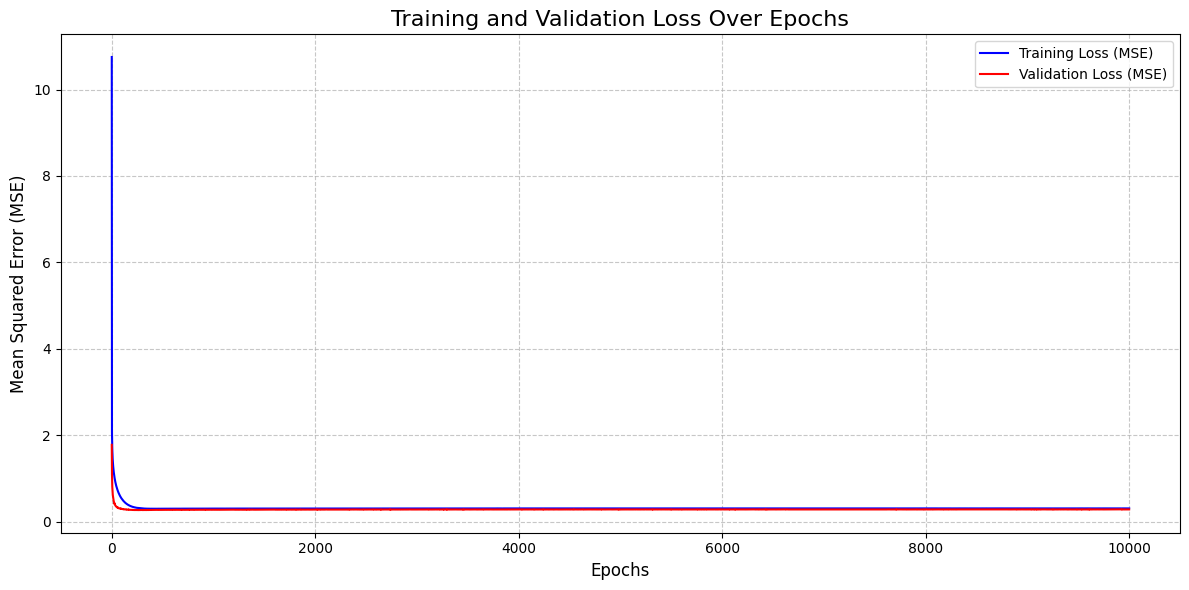

In [42]:
epochs = range(len(train_losses_opt))

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_losses_opt, label='Training Loss (MSE)', color='blue')
plt.plot(epochs, val_losses_opt, label='Validation Loss (MSE)', color='red')
plt.title('Training and Validation Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('nn_regression_loss_curve.png')
# plt.show()

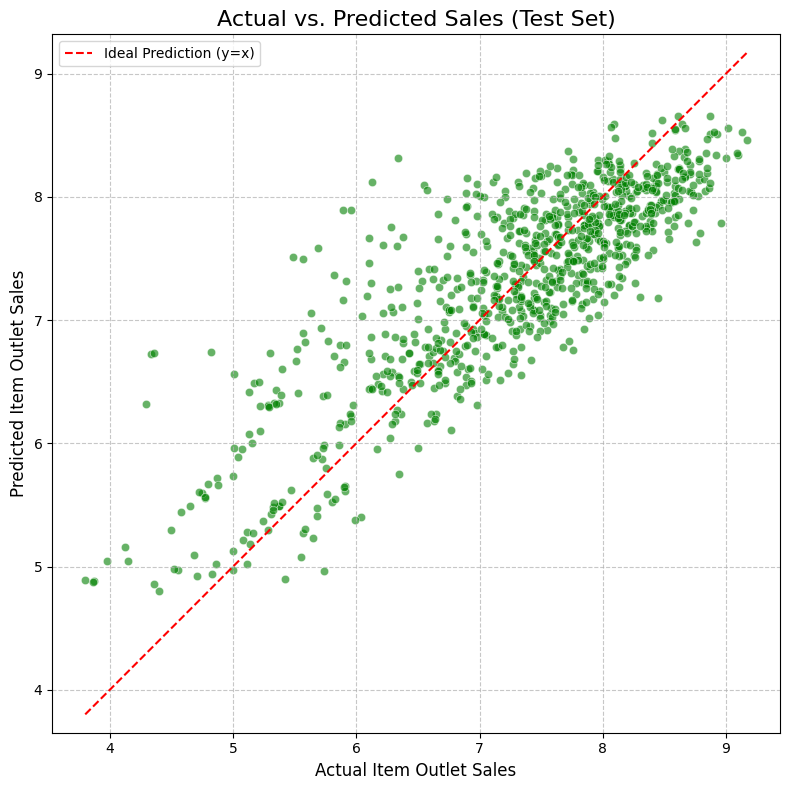

In [43]:
y_test_flat = y_test_np.flatten()
Y_test_pred_flat = Y_test_pred_opt.flatten()

plt.figure(figsize=(8, 8))
plt.scatter(y_test_flat, Y_test_pred_flat, alpha=0.6, edgecolors='w', linewidths=0.5, color='green')

max_val = max(y_test_flat.max(), Y_test_pred_flat.max())
min_val = min(y_test_flat.min(), Y_test_pred_flat.min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Prediction (y=x)')

plt.title('Actual vs. Predicted Sales (Test Set)', fontsize=16)
plt.xlabel('Actual Item Outlet Sales', fontsize=12)
plt.ylabel('Predicted Item Outlet Sales', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axis('equal')
plt.tight_layout()
plt.savefig('nn_regression_actual_vs_predicted.png')
# plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

input_size = X_train_np.shape[1]
h1_size = 128
h2_size = 64
h3_size = 32
output_size = y_train_np.shape[1]

def relu(Z):
    return np.maximum(0, Z)

def relu_activation_deriv(dA, Z):
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

def linear(Z):
    return Z

def linear_activation_deriv(dA, Z):
    return dA

def initialize_parameters(input_size, h1_size, h2_size, h3_size, output_size):
    np.random.seed(42)
    params = {}
    params['W1'] = np.random.randn(input_size, h1_size) * np.sqrt(2 / input_size)
    params['b1'] = np.zeros((1, h1_size))
    params['W2'] = np.random.randn(h1_size, h2_size) * np.sqrt(2 / h1_size)
    params['b2'] = np.zeros((1, h2_size))
    params['W3'] = np.random.randn(h2_size, h3_size) * np.sqrt(2 / h2_size)
    params['b3'] = np.zeros((1, h3_size))
    params['W4'] = np.random.randn(h3_size, output_size) * np.sqrt(1 / h3_size)
    params['b4'] = np.zeros((1, output_size))
    return params

def initialize_momentum_vectors(params):
    v = {}
    L = 4
    for l in range(1, L + 1):
        v['dW' + str(l)] = np.zeros(params['W' + str(l)].shape)
        v['db' + str(l)] = np.zeros(params['b' + str(l)].shape)
    return v

def linear_forward(A_prev, W, b):
    Z = np.dot(A_prev, W) + b
    return Z

def forward_propagation(A_prev, W, b, activation_func):
    Z = linear_forward(A_prev, W, b)
    A = activation_func(Z)
    cache = (A_prev, W, b, Z)
    return A, cache

def full_forward_pass_3_layers(X, params, is_training=True, dropout_rate=0.5):
    caches = []

    A1_pre, cache1 = forward_propagation(X, params['W1'], params['b1'], relu)

    if is_training:
        D1 = np.random.rand(*A1_pre.shape) > dropout_rate
        A1 = A1_pre * D1 / (1 - dropout_rate)
        caches.append((D1, cache1))
    else:
        A1 = A1_pre
        caches.append((None, cache1))

    A2_pre, cache2 = forward_propagation(A1, params['W2'], params['b2'], relu)

    if is_training:
        D2 = np.random.rand(*A2_pre.shape) > dropout_rate
        A2 = A2_pre * D2 / (1 - dropout_rate)
        caches.append((D2, cache2))
    else:
        A2 = A2_pre
        caches.append((None, cache2))

    A3_pre, cache3 = forward_propagation(A2, params['W3'], params['b3'], relu)

    if is_training:
        D3 = np.random.rand(*A3_pre.shape) > dropout_rate
        A3 = A3_pre * D3 / (1 - dropout_rate)
        caches.append((D3, cache3))
    else:
        A3 = A3_pre
        caches.append((None, cache3))

    Y_hat, cache4 = forward_propagation(A3, params['W4'], params['b4'], linear)
    caches.append(cache4)

    return Y_hat, caches

def compute_loss(Y_hat, Y, params, lambd, m):
    loss = (1/m) * np.sum((Y_hat - Y)**2)
    total_loss = loss

    if lambd > 0 and 'W1' in params:
        L2_cost = (lambd / (2 * m)) * (
            np.sum(np.square(params['W1'])) +
            np.sum(np.square(params['W2'])) +
            np.sum(np.square(params['W3'])) +
            np.sum(np.square(params['W4']))
        )
        total_loss += L2_cost

    dY_hat = (2/m) * (Y_hat - Y)
    return total_loss, dY_hat

def linear_step_backward(dZ, cache):
    A_prev, W, b, Z = cache
    m = A_prev.shape[0]

    dW = (1/m) * np.dot(A_prev.T, dZ)
    db = (1/m) * np.sum(dZ, axis=0, keepdims=True)
    dA_prev = np.dot(dZ, W.T)
    return dA_prev, dW, db

def backward_propagation(dA, cache, activation_deriv_func):
    Z = cache[3]
    dZ = activation_deriv_func(dA, Z)
    dA_prev, dW, db = linear_step_backward(dZ, cache)
    return dA_prev, dW, db

def full_backward_pass_3_layers(Y_hat, Y, caches, dropout_rate=0.5):
    grads = {}
    m = Y.shape[0]

    dY_hat = (2 / m) * (Y_hat - Y)
    dA4 = dY_hat

    cache4 = caches[3]
    dA3_pre_drop, grads['dW4'], grads['db4'] = backward_propagation(dA4, cache4, linear_activation_deriv)

    D3, cache3 = caches[2]
    dA3 = dA3_pre_drop * D3 / (1 - dropout_rate)
    dA2_pre_drop, grads['dW3'], grads['db3'] = backward_propagation(dA3, cache3, relu_activation_deriv)

    D2, cache2 = caches[1]
    dA2 = dA2_pre_drop * D2 / (1 - dropout_rate)
    dA1_pre_drop, grads['dW2'], grads['db2'] = backward_propagation(dA2, cache2, relu_activation_deriv)

    D1, cache1 = caches[0]
    dA1 = dA1_pre_drop * D1 / (1 - dropout_rate)
    dA0, grads['dW1'], grads['db1'] = backward_propagation(dA1, cache1, relu_activation_deriv)

    return grads

def update_parameters_with_L2_Momentum(params, grads, v, alpha, beta, lambd, m):
    L = 4
    for l in range(1, L + 1):
        grads['dW' + str(l)] = grads['dW' + str(l)] + (lambd / m) * params['W' + str(l)]
        v['dW' + str(l)] = beta * v['dW' + str(l)] + (1 - beta) * grads['dW' + str(l)]
        v['db' + str(l)] = beta * v['db' + str(l)] + (1 - beta) * grads['db' + str(l)]
        params['W' + str(l)] = params['W' + str(l)] - alpha * v['dW' + str(l)]
        params['b' + str(l)] = params['b' + str(l)] - alpha * v['db' + str(l)]
    return params, v

def random_mini_batches(X, Y, mini_batch_size=32, seed=42):
    np.random.seed(seed)
    m = X.shape[0]
    mini_batches = []

    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :]
    shuffled_Y = Y[permutation, :]

    num_complete_minibatches = m // mini_batch_size

    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : (k + 1) * mini_batch_size, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : (k + 1) * mini_batch_size, :]
        mini_batches.append((mini_batch_X, mini_batch_Y))

    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m, :]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m, :]
        mini_batches.append((mini_batch_X, mini_batch_Y))

    return mini_batches

def nn_model_optimized_with_dropout(X_train, Y_train, X_val, Y_val, input_size, h1_size, h2_size, h3_size, output_size, alpha, epochs, beta, lambd, mini_batch_size=32, dropout_rate=0.5):

    m_train = X_train.shape[0]
    m_val = X_val.shape[0]
    params = initialize_parameters(input_size, h1_size, h2_size, h3_size, output_size)
    v = initialize_momentum_vectors(params)
    train_losses = []
    val_losses = []
    seed = 42

    for i in range(epochs):
        epoch_train_loss = 0
        seed += 1
        mini_batches = random_mini_batches(X_train, Y_train, mini_batch_size, seed)

        for mini_batch_X, mini_batch_Y in mini_batches:
            m_batch = mini_batch_X.shape[0]

            Y_hat, caches = full_forward_pass_3_layers(mini_batch_X, params, is_training=True, dropout_rate=dropout_rate)

            batch_loss, _ = compute_loss(Y_hat, mini_batch_Y, params, lambd, m_batch)
            epoch_train_loss += batch_loss * m_batch / m_train

            grads = full_backward_pass_3_layers(Y_hat, mini_batch_Y, caches, dropout_rate=dropout_rate)

            params, v = update_parameters_with_L2_Momentum(params, grads, v, alpha, beta, lambd, m_batch)

        train_losses.append(epoch_train_loss)

        Y_val_hat, _ = full_forward_pass_3_layers(X_val, params, is_training=False)
        val_loss, _ = compute_loss(Y_val_hat, Y_val, params, 0, m_val)
        val_losses.append(val_loss)

        if i % 500 == 0:
            print(f"Epoch {i}: Train Loss = {epoch_train_loss:.4f}, Val Loss = {val_loss:.4f}")

    return params, train_losses, val_losses

alpha = 0.001
epochs = 5000
beta = 0.9
lambd = 0.1
mini_batch_size = 32
dropout_rate = 0.5

print(f"\nStarting Training with Dropout={dropout_rate}, Alpha={alpha}, Epochs={epochs}")

final_params_dropout, train_losses_dropout, val_losses_dropout = nn_model_optimized_with_dropout(
    X_train_np, y_train_np, X_val_np, y_val_np,
    input_size, h1_size, h2_size, h3_size, output_size,
    alpha, epochs, beta, lambd, mini_batch_size, dropout_rate
)

print("\n--- Training Completed for Dropout Experiment ---")

def predict(X, params):
    Y_pred, _ = full_forward_pass_3_layers(X, params, is_training=False)
    return Y_pred

def evaluate_metrics(Y_true, Y_pred):
    mse = mean_squared_error(Y_true, Y_pred)
    mae = mean_absolute_error(Y_true, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_true, Y_pred)
    return mse, mae, rmse, r2

Y_test_pred_dropout = predict(X_test_np, final_params_dropout)
mse_dropout, mae_dropout, rmse_dropout, r2_dropout = evaluate_metrics(y_test_np, Y_test_pred_dropout)

print("\n--- Model Evaluation on Test Set (with Dropout) ---")
print(f"Test MSE (Dropout): {mse_dropout:.4f}")
print(f"Test R² Score (Dropout): {r2_dropout:.4f}")


Starting Training with Dropout=0.5, Alpha=0.001, Epochs=5000
Epoch 0: Train Loss = 50.3222, Val Loss = 35.6033
Epoch 500: Train Loss = 2.8300, Val Loss = 2.5261
Epoch 1000: Train Loss = 1.5519, Val Loss = 0.9948
Epoch 1500: Train Loss = 1.0527, Val Loss = 0.5920
Epoch 2000: Train Loss = 0.8629, Val Loss = 0.4859
Epoch 2500: Train Loss = 0.7394, Val Loss = 0.4472
Epoch 3000: Train Loss = 0.6843, Val Loss = 0.4296
Epoch 3500: Train Loss = 0.6438, Val Loss = 0.4204
Epoch 4000: Train Loss = 0.6157, Val Loss = 0.4125
Epoch 4500: Train Loss = 0.5927, Val Loss = 0.4049

--- Training Completed for Dropout Experiment ---

--- Model Evaluation on Test Set (with Dropout) ---
Test MSE (Dropout): 0.4486
Test R² Score (Dropout): 0.5827
